<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84%ED%86%B5%EA%B3%84_%EB%AA%A8%ED%8F%89RPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 실행 후 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#plotly 결과를 png 파일로 저장하기 위해 필요한 'kaleido' 라이브러리 
#!pip uninstall -y kaleido
!pip install -U kaleido

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo3.csv', encoding = 'cp949')

# 첫 5줄을 봅니다. 
df.head(4)

In [ ]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

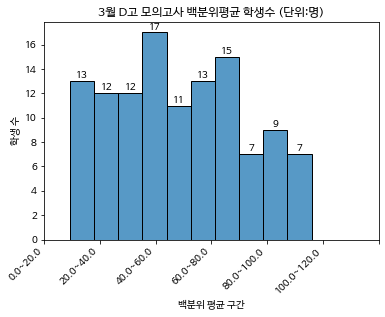

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# create the histogram plot
ax = sns.histplot(df.백분위_평균, bins=10, kde=False)
bin_edges = ax.get_xticks()

# add count values to each bar
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.text(x, y, f'{int(y)}', ha='center', va='bottom')

# set the plot title and axis labels
plt.title("3월 D고 모의고사 백분위평균 학생수 (단위:명)")
plt.xlabel('백분위 평균 구간')
plt.ylabel('학생 수')

# set the X axis tick labels to the bin edges
ax.set_xticks(bin_edges)
labels = ['{:.1f}~{:.1f}'.format(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)] + ['']
#ax.set_xticklabels(labels)
ax.set_xticklabels(labels, rotation=45, ha='right')


# display the plot
plt.show()


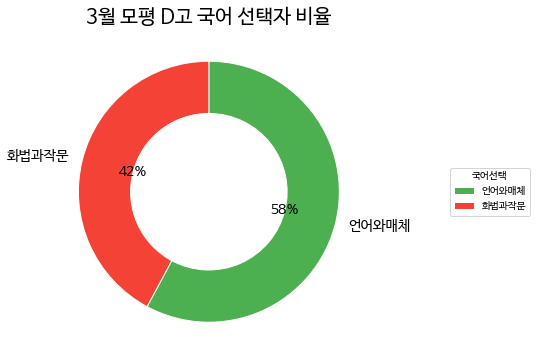

In [ ]:
#국어 선택자 비율 자동산출

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo3.csv', encoding = 'cp949')


# Calculate the percentage of each variable in the '탐구영역' column
df_tamgu_count = df['선택_국어'].value_counts()
df_tamgu_pct = df_tamgu_count / df_tamgu_count.sum() * 100

# Define colors for each variable
colors = ['#4CAF50', '#F44336', '#2196F3', '#FFEB3B']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of unique identifier values based on the length of the df_tamgu_pct list
ids = list(range(len(df_tamgu_pct)))

# Create a half doughnut plot with unique identifier values for each wedge
wedges, labels, _ = ax.pie(df_tamgu_pct, colors=colors, wedgeprops={'width': 0.4, 'edgecolor': 'white', 'linewidth': 1}, autopct='%1.0f%%', startangle=90, counterclock=False, labels=df_tamgu_pct.index, textprops={'fontsize': 14})

# Add text labels with percentage values
for w, l, i in zip(wedges, labels, ids):
    ang = (w.theta2 - w.theta1) / 2. + w.theta1
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    x *= 1.5
    ax.annotate(f'{l.get_text()} ({df_tamgu_pct[i]:.1f}%)', xy=(x, y), va='center', ha='center', fontsize=12, color='white', rotation=ang, rotation_mode='anchor', gid=i)

# Add a title and legend
ax.set_title('3월 모평 D고 국어 선택자 비율', fontsize=20)
ax.legend(title='국어선택', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()


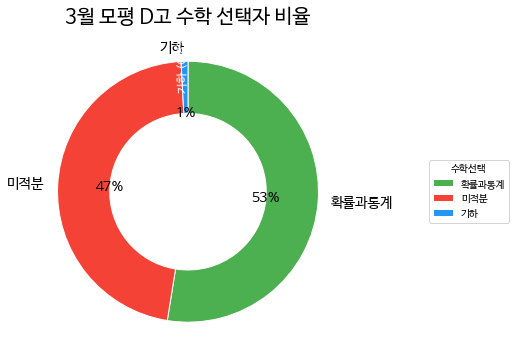

In [ ]:
#수학 선택자 비율  자동산출

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo3.csv', encoding = 'cp949')


# Calculate the percentage of each variable in the '탐구영역' column
df_tamgu_count = df['선택_수학'].value_counts()
df_tamgu_pct = df_tamgu_count / df_tamgu_count.sum() * 100

# Define colors for each variable
colors = ['#4CAF50', '#F44336', '#2196F3', '#FFEB3B']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of unique identifier values based on the length of the df_tamgu_pct list
ids = list(range(len(df_tamgu_pct)))

# Create a half doughnut plot with unique identifier values for each wedge
wedges, labels, _ = ax.pie(df_tamgu_pct, colors=colors, wedgeprops={'width': 0.4, 'edgecolor': 'white', 'linewidth': 1}, autopct='%1.0f%%', startangle=90, counterclock=False, labels=df_tamgu_pct.index, textprops={'fontsize': 14})

# Add text labels with percentage values
for w, l, i in zip(wedges, labels, ids):
    ang = (w.theta2 - w.theta1) / 2. + w.theta1
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    x *= 1.5
    ax.annotate(f'{l.get_text()} ({df_tamgu_pct[i]:.1f}%)', xy=(x, y), va='center', ha='center', fontsize=12, color='white', rotation=ang, rotation_mode='anchor', gid=i)

# Add a title and legend
ax.set_title('3월 모평 D고 수학 선택자 비율', fontsize=20)
ax.legend(title='수학선택', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()


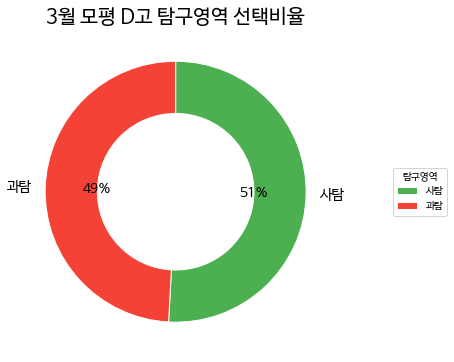

In [ ]:
#탐구영역 선택자 비율  자동산출

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo3.csv', encoding = 'cp949')


# Calculate the percentage of each variable in the '탐구영역' column
df_tamgu_count = df['탐구영역'].value_counts()
df_tamgu_pct = df_tamgu_count / df_tamgu_count.sum() * 100

# Define colors for each variable
colors = ['#4CAF50', '#F44336', '#2196F3', '#FFEB3B']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list of unique identifier values based on the length of the df_tamgu_pct list
ids = list(range(len(df_tamgu_pct)))

# Create a half doughnut plot with unique identifier values for each wedge
wedges, labels, _ = ax.pie(df_tamgu_pct, colors=colors, wedgeprops={'width': 0.4, 'edgecolor': 'white', 'linewidth': 1}, autopct='%1.0f%%', startangle=90, counterclock=False, labels=df_tamgu_pct.index, textprops={'fontsize': 14})

# Add text labels with percentage values
for w, l, i in zip(wedges, labels, ids):
    ang = (w.theta2 - w.theta1) / 2. + w.theta1
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    x *= 1.5
    ax.annotate(f'{l.get_text()} ({df_tamgu_pct[i]:.1f}%)', xy=(x, y), va='center', ha='center', fontsize=12, color='white', rotation=ang, rotation_mode='anchor', gid=i)

# Add a title and legend
ax.set_title('3월 모평 D고 탐구영역 선택비율', fontsize=20)
ax.legend(title='탐구영역', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()


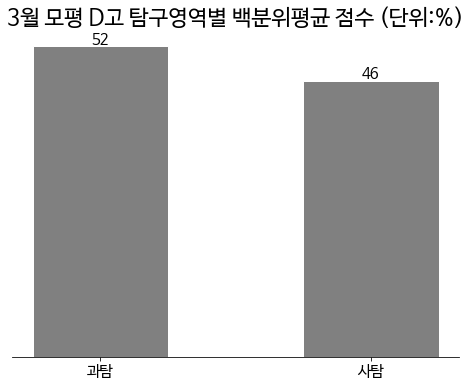

In [ ]:
#탐구 백분위_평균 점수 자동산출
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo3.csv', encoding='cp949')

# Group data by '탐구영역' and calculate the mean of '백분위_평균'
df_mean = df.groupby('탐구영역')['백분위_평균'].mean()

# Set bar plot colors
colors = ['gray', 'gray']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create a vertical bar plot
ax.bar(df_mean.index, df_mean, color=colors, edgecolor='white', width=0.5)

# Add value labels on each bar plot
for i, v in enumerate(df_mean):
    ax.text(i, v+0.5, f'{v:.0f}', ha='center', fontsize=15, color='black')

# Add a title and axis labels
ax.set_title('3월 모평 D고 탐구영역별 백분위평균 점수 (단위:%)', fontsize=22)
ax.set_ylabel('')

# Enlarge x-axis tick labels
ax.tick_params(axis='x', labelsize=15)

# Remove y-axis ticks and label
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load data
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}mo3.csv', encoding='cp949')
df_new = df[['선택_탐구1', '선택_탐구2', '백분위_탐구1', '백분위_탐구2']].dropna()
df_new1 = pd.melt(df_new, value_vars=['선택_탐구1', '선택_탐구2'], var_name='electives_tamgu')
df_new2 = pd.melt(df_new, value_vars=['백분위_탐구1', '백분위_탐구2'], var_name='percentile_tamgu')
df_new3 = pd.concat([df_new1, df_new2], axis=1)
df_new3.columns = ["선택탐구12", "탐구과목명", "백분위탐구12",  "백분위점수"]
df_new3 = df_new3[['탐구과목명']]
df_counts = df_new3['탐구과목명'].value_counts().reset_index()
df_counts.columns = ['탐구과목명', 'count']

# Create the treemap plot
fig = px.treemap(df_counts, path=['탐구과목명'], values='count')
fig.update_traces(textfont=dict(size=30))


# Update the title font size
# Set the font size of the title
fig.update_layout(
    title_font_size = 35,
    title={
        'text': '3월 모평 탐구선택 현황',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top' })


# Save the plot as a PNG image using the kaleido engine
path1 = '/content/drive/MyDrive/python/deungchon/result_treemap/'
fig.write_image(f'{path1}tamgu_tree.png', engine='kaleido')

#save it as a html 파일
fig.write_html(f'{path1}tamgu_tree.html')

# Save the plot as a PDF file
fig.write_image(f'{path1}tamgu_tree.pdf', format='pdf', engine='kaleido')

# Show the plot
fig.show()